## 1. 손 글씨 숫자 데이터셋
손글씨 숫자 데이터셋은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(검은색)에서 16(흰색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# sklearn 안에 들어가있는 데이터셋을 불러오기위해
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# min-batch 경사하강법을 쓰기위한 모듈
from torch.utils.data import DataLoader

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
X_data = digits['data']
X_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y_data = digits['target']
y_data

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
print(X_data)
print(y_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [6]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


### ※ axes.flatten()

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

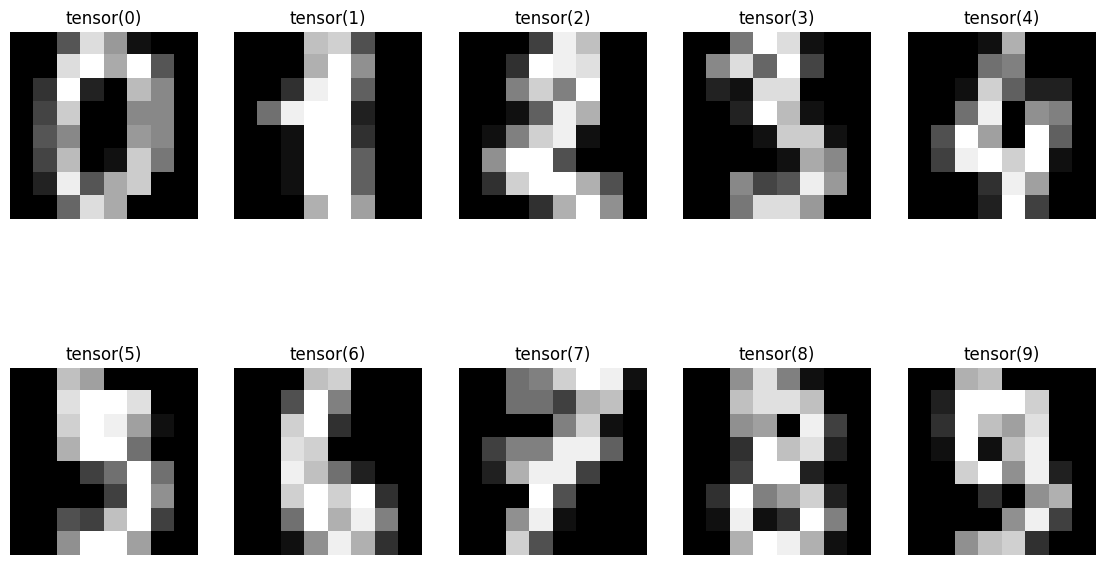

In [7]:
# nrow : 행 개수 , ncols : 열 개수
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))

# axes.flatten : 일단 한 열로 만들고 반복문 돌림(이중 for문과 같은 복잡한 for문과 유사기능)
for i, ax in enumerate(axes.flatten()):
    # gray 스케일에는 밝기정보가 있음 -> 밝기정보를 정규화시켜줄 수 있음
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    # 격자 X
    ax.axis('off')

In [8]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


## 2. 데이터 로더
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

### ※ 데이터로더의 주요 역할

- **배치 처리** : 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
- **셔플링** : 데이터 순서를 무작위로 섞어 과적합 방지.
- **병렬 처리** : num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
- **반복 처리**: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

In [9]:
loader = DataLoader(
    # 1. 데이터셋을 어떻게 제공할지 -> list로 tuple형식으로 넣어줄 것 (이미지 + 정답)
    dataset=list(zip(x_train, y_train)),
    # dataset을 64개씩 한 집단으로(batch)로 묶는다.
    batch_size=64,
    shuffle = True,
    drop_last=False
)

# train data = 1360개 중 64개 집단으로 묶었으니까 총 22개의 batch가 학습되는데,
# 이때 29개의 나머지 데이터셋이 남는다.
# 그래서 이 짜투리 29개를 학습할건지 묻는것 drop_last

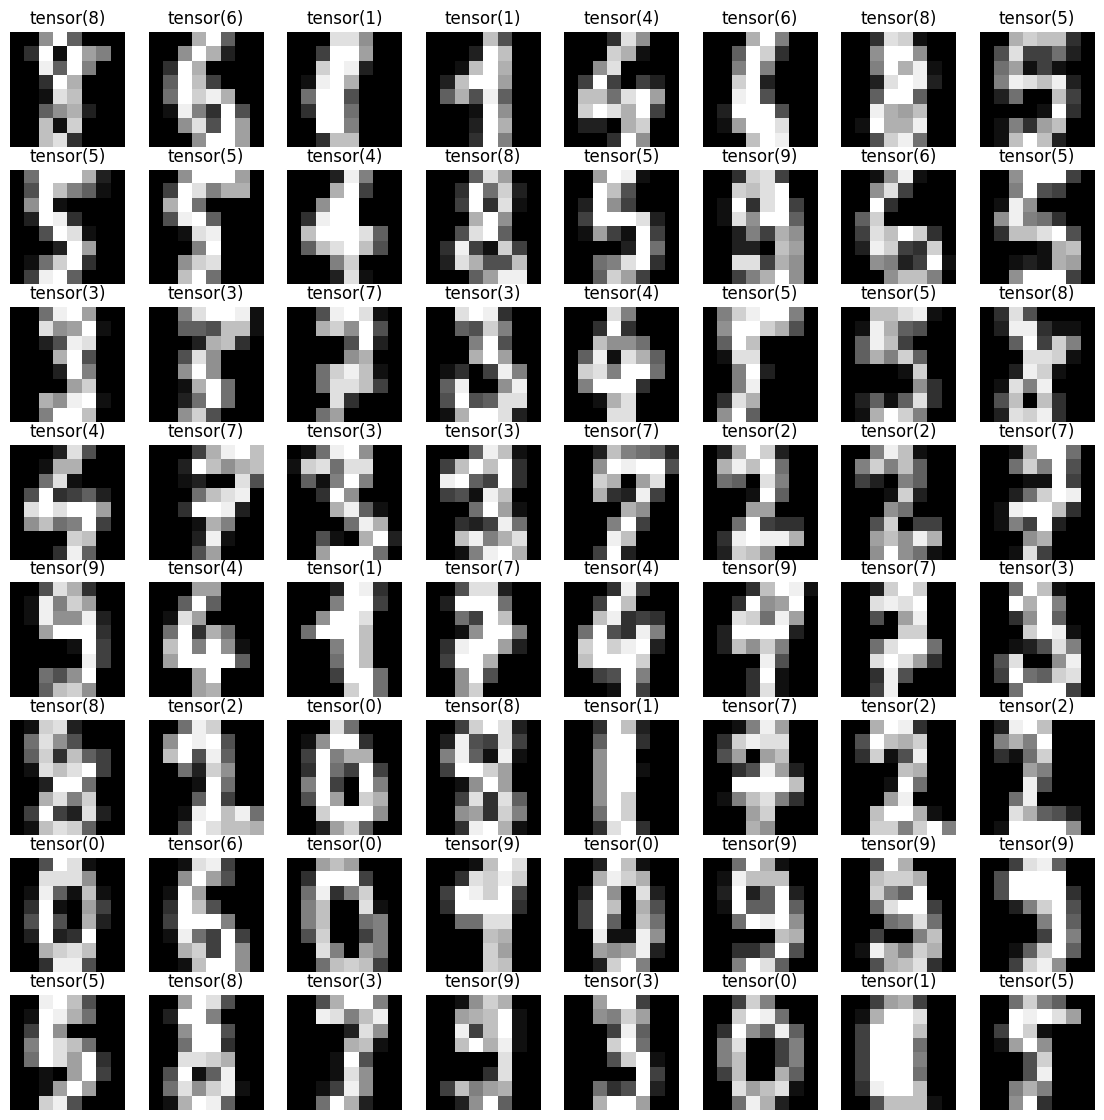

In [10]:
imgs, labels = next(iter(loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

# Batch 하나에 들어간 이미지+정답 데이터

## 모델 생성

In [11]:
model = nn.Sequential(
    nn.Linear(64, 10)       # loss 함수할 때 softmax에 의해 확률로 계산될 것임
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
epochs = 100

for epoch in range(epochs + 1):
    sum_losses = 0
    # 정확도
    sum_accs = 0

    # x_batch : 이미지 batch , y_batch : 정답 batch
    for x_batch, y_batch in loader:     # loader에 22 +1(짜투리 batch)
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        # 기울기 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss값 누적 (총 23번) -> loss값 평균 구하기
        sum_losses = sum_losses + loss

        # 얼마나 잘 맞추는지도 알아보자!
        y_prob = nn.Softmax(1)(y_pred)
        # 그 중에서 가장 높은 값의 인덱스 뽑기
        y_pred_index = torch.argmax(y_prob, axis=1)
        # 정답과 예측이 맞는지? -> 0 or 1로 나올 것 그러고 전체로 나눔 -> 백분률
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        # 정답값 누적 (총 23번) -> 정확도 평균 구하기
        sum_accs = sum_accs + acc
        # // epoch 1번 끝


    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 1.841803 Accuracy: 57.39%
Epoch    1/100 Loss: 0.230102 Accuracy: 92.85%
Epoch    2/100 Loss: 0.140616 Accuracy: 95.45%
Epoch    3/100 Loss: 0.111209 Accuracy: 97.00%
Epoch    4/100 Loss: 0.101230 Accuracy: 96.94%
Epoch    5/100 Loss: 0.092783 Accuracy: 97.21%
Epoch    6/100 Loss: 0.084644 Accuracy: 97.66%
Epoch    7/100 Loss: 0.070226 Accuracy: 97.76%
Epoch    8/100 Loss: 0.076584 Accuracy: 97.27%
Epoch    9/100 Loss: 0.067668 Accuracy: 98.03%
Epoch   10/100 Loss: 0.051005 Accuracy: 98.91%
Epoch   11/100 Loss: 0.048446 Accuracy: 98.71%
Epoch   12/100 Loss: 0.046666 Accuracy: 99.05%
Epoch   13/100 Loss: 0.034974 Accuracy: 99.66%
Epoch   14/100 Loss: 0.035591 Accuracy: 99.39%
Epoch   15/100 Loss: 0.035527 Accuracy: 99.39%
Epoch   16/100 Loss: 0.033815 Accuracy: 99.24%
Epoch   17/100 Loss: 0.035654 Accuracy: 99.32%
Epoch   18/100 Loss: 0.033818 Accuracy: 99.32%
Epoch   19/100 Loss: 0.027094 Accuracy: 99.52%
Epoch   20/100 Loss: 0.032065 Accuracy: 99.25%
Epoch   21/10

tensor(5)


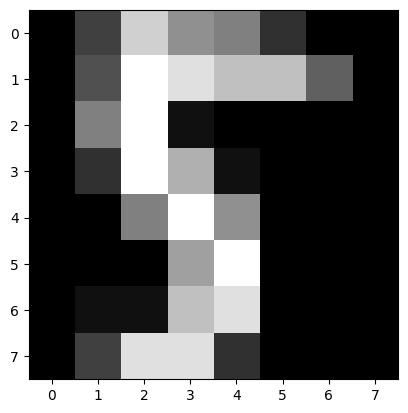

In [13]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [14]:
y_pred = model(x_test)
y_pred[10]

tensor([-3.3115, -9.0064, -1.9215,  3.0432, -1.7482, 18.1348, -4.0397,  5.0460,
         5.0657, -5.2794], grad_fn=<SelectBackward0>)

In [15]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([4.8526e-10, 1.6319e-12, 1.9482e-09, 2.7913e-07, 2.3170e-09, 1.0000e+00,
        2.3428e-10, 2.0683e-06, 2.1093e-06, 6.7812e-11],
       grad_fn=<SelectBackward0>)

In [16]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 1.00
숫자 6일 확률: 0.00
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [17]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  96.94% 입니다.


## 3. 데이터 증강

데이터 증강(Data Augmentation)은 학습 데이터를 인위적으로 변환하여 데이터셋의 다양성을 높이고 모델의 일반화 성능을 향상시키는 기법입니다. 회전, 크기 조정, 반전, 블러링, 밝기 조정 등 다양한 변환을 적용하여 원본 데이터로부터 새로운 데이터를 생성합니다. 이를 통해 데이터 부족 문제를 완화하고 모델이 특정 패턴에 과적합되지 않도록 도와줍니다. 특히, 이미지나 음성 데이터와 같이 특징이 직관적인 데이터에서 효과적으로 활용되며, 증강된 데이터는 모델이 예측 대상의 다양한 변형에 대해 강하게 학습할 수 있도록 돕습니다.

In [20]:
# 데이터 변환 시 transforms 모듈 사용
from torchvision import transforms
# Tensor형을 Dataset에 저장할 수 있는 -> Dataset자체를 Tensor형으로 만들 수 있는
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# torch.Size([1437, 64]) torch.Size([1437])
# torch.Size([360, 64]) torch.Size([360])

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


In [22]:
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

### ※ transforms.Compose

여러 데이터 변환(transform) 작업을 순차적으로 적용할 수 있도록 해줍니다. 이미지 데이터 전처리와 증강 과정에서 자주 사용되며, 각 변환을 하나의 리스트로 묶어 실행합니다.

[링크](https://docs.pytorch.org/vision/0.9/transforms.html)

In [27]:
transform =  transforms.Compose([
    # 데이터를 여러가지로 변형시켜줄때 , 조건들 넣는 곳
    transforms.RandomRotation(10),  # -10도 +10도 사이에 무작위 각도로 회전
    transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1))      # degree = 0 , shear로 틀어주는 것 5도 무작위
])

1. transforms.RandomRotation(10)

- 기능: 이미지를 -10도에서 +10도 사이로 무작위 회전시킵니다.
    - 10은 회전 범위를 나타냅니다.
    - 각 호출 시, -10도 ~ +10도 범위에서 무작위로 각도를 선택하여 이미지를 회전합니다.

<br>

2. transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1))

- 기능: 이미지를 비틀기(shear), 크기 조정(scale) 등의 변환을 수행합니다.
    - 0: 회전(각도) 변환을 수행하지 않음을 의미합니다.
    - shear=5: 이미지를 최대 5도만큼 비스듬하게 비틀기(shear) 변환을 수행합니다.
        - 예: 정사각형이 평행사변형처럼 기울어질 수 있습니다.
- scale=(0.9, 1.1):
    - 이미지를 0.9배(축소)에서 1.1배(확대) 범위 내에서 무작위 크기 조정을 수행합니다.
    - 각 호출 시, 무작위로 크기가 변경됩니다.

In [28]:
class AugmentedDataset(Dataset):
    def __init__(self,dataset,transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self,idx):
        x,y = self.dataset[idx]
        x = x.view(8,8).unsqueeze(0)    # (8,8) -> (1,8,8) 로 차원 하나 증가 밝기와 같은
        x = self.transform(x)          # 흑백채널을 증강 적용했다?
        return x.flatten(),y

In [29]:
augmented_train_dataset = AugmentedDataset(train_dataset,transform)

In [30]:
train_loader = DataLoader(augmented_train_dataset, batch_size = 64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle = False)

In [31]:
# next : 하나씩 뽑아서
imgs, labels = next(iter(train_loader))

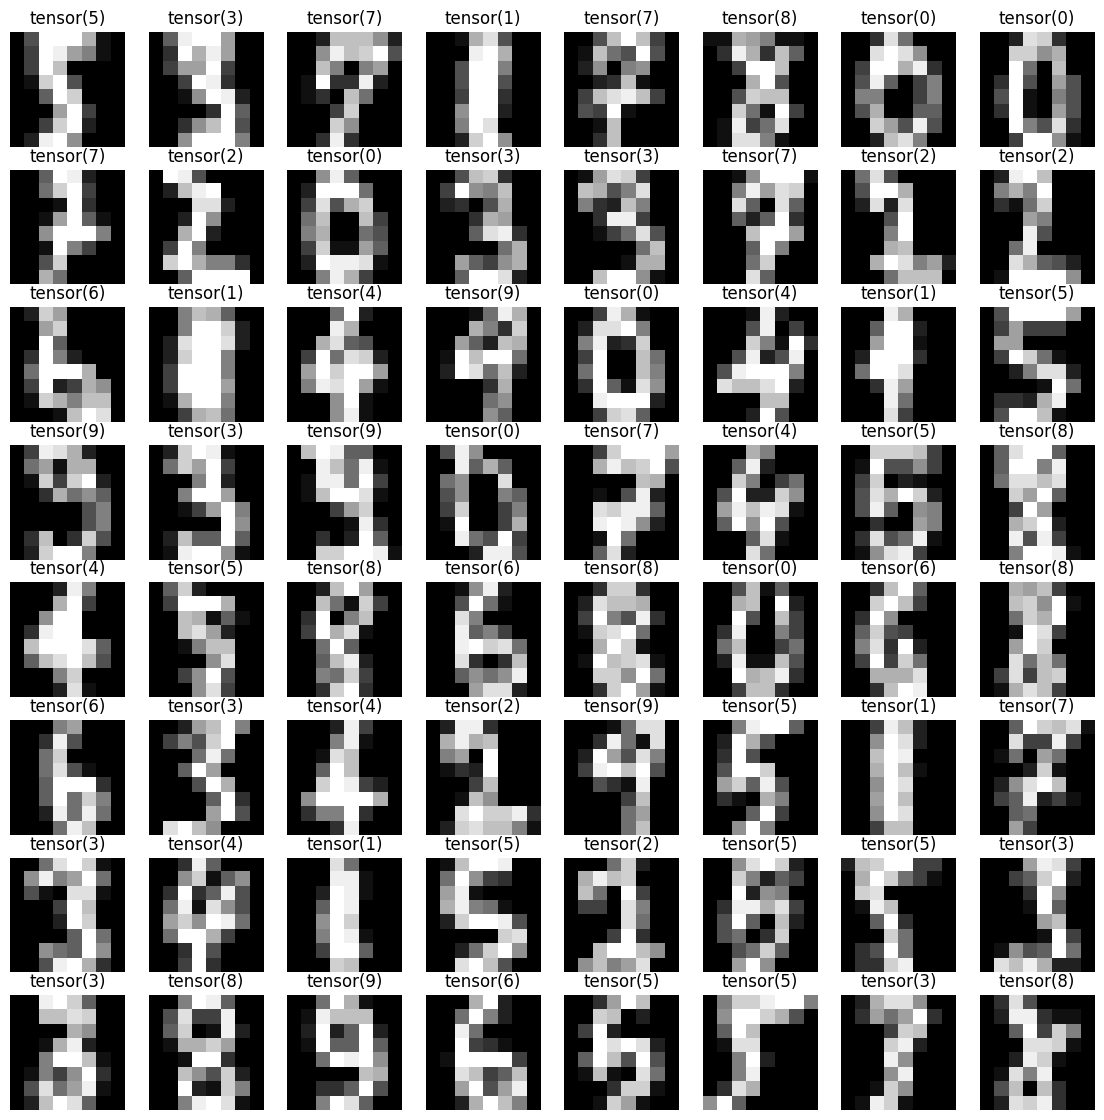

In [32]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [33]:
for images, labels in train_loader:
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    break

Image batch shape: torch.Size([64, 64])
Label batch shape: torch.Size([64])


In [35]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(),lr = 0.01)

epochs = 100

for epoch in range(epochs+1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in train_loader:
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred,y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses =  sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    if epoch % 10 == 0:
        avg_loss = sum_losses / len(loader)
        avg_acc = sum_accs / len(loader)
        print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 1.715739 Accuracy: 60.45%
Epoch   10/100 Loss: 0.064950 Accuracy: 98.30%
Epoch   20/100 Loss: 0.051647 Accuracy: 98.71%
Epoch   30/100 Loss: 0.034454 Accuracy: 98.78%
Epoch   40/100 Loss: 0.021139 Accuracy: 99.59%
Epoch   50/100 Loss: 0.028708 Accuracy: 99.12%
Epoch   60/100 Loss: 0.019331 Accuracy: 99.39%
Epoch   70/100 Loss: 0.055381 Accuracy: 97.81%
Epoch   80/100 Loss: 0.024173 Accuracy: 99.05%
Epoch   90/100 Loss: 0.013296 Accuracy: 99.59%
Epoch  100/100 Loss: 0.011704 Accuracy: 99.66%


tensor(7)


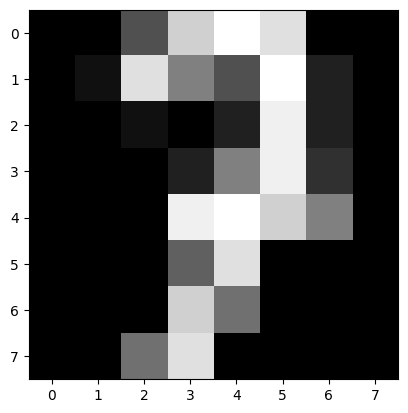

In [36]:
plt.imshow(x_test[11].reshape((8, 8)), cmap='gray')
print(y_test[11])

In [37]:
y_pred = model(x_test)
y_pred[11]

tensor([-16.0701,  -9.0280,  -0.2216,   4.9087,  -6.9375,  -7.8656, -39.3664,
         22.8526,  -8.2852,   2.2194], grad_fn=<SelectBackward0>)

In [38]:
y_prob = nn.Softmax(1)(y_pred)      # 뭐일 확률이 몇일까?
y_prob[11]

tensor([1.2477e-17, 1.4270e-14, 9.5278e-11, 1.6109e-08, 1.1543e-13, 4.5631e-14,
        9.5201e-28, 1.0000e+00, 2.9994e-14, 1.0943e-09],
       grad_fn=<SelectBackward0>)

In [39]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[11][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.00
숫자 6일 확률: 0.00
숫자 7일 확률: 1.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00
